# Project: Investigating TMDb Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've decided to go forward with analyzing the data set of 'The Movie Database (TMDb)'."This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast and genresThe final two columns ending with “_adj” show the budget and revenue of the associated movies.


In [188]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
df = pd.read_csv('tmdb_movies.csv')

In [189]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [190]:
df.shape

(10866, 21)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Obsevations from the TMDb Movie Dataset:

1.) No unit of currency is mentioned in the dataset for columns like'budget', 'revenue', 'budget_adj', 'revenue_adj'* has not given us the currency but for this dataset we will assume that it is in dollars as it is the most used international currency.

2.) vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count.
for example, the movie *'Mad Max : Fury Road'* has *6k+* votes while *Sinister 2* has only *331 votes* (as seen above). Since the votes of the movies vary so much the *vote_average* column also is effected by it. So we cannot calculate or assume that movie with highest votes or rating was more successful since the voters of each film vary.

<h4>Questions to which dataset can be explored for answers:</h4> 
<ol>
<li>Which movie has earned the most and least profit?</li>
<li>Which movie had the longest and shortest runtime?</li>
<li>Which movie had the most and least budget?</li>
<li>Which movie had the most and least revenue?</li>
<li>What is the average runtime of all movies?</li>
<li>In which year we had the most movies making profits?</li>
</ol>

<ol>Similar characteristics associated with the profitable movies can be analyzed like,
<li>Average duration of movies.</li>
<li>Average Budget.</li>
<li>Average revenue.</li>
<li>Average profits.</li>
<li>Which director directed most films?</li>
<li>Which cast has appeared more frequently?</li>
<li>Which genre were more successful?</li>

<a id='cleaning'></a>
## Data Cleaning (Removing the unused information from the dataset)

After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. 

<ul>
 <li>we will remove unnecessory columns such as *'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count' and 'vote_average'.*</li>
<li>As you can see in this database of movies there are lots of movies where the budget or revenue have a value of '0' which   means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we need to delete these rows.</li>
<li>Also this dataset has some duplicate rows. We have to clean that too for appropriate results.</li>
<li>We will also calculate the average runtime of the movies so in case if we have a runtime of a movie '0' then we need to replace it with `NaN`.</li>
<li>The 'release_date' column must be converted into date format.</li>
<li>Checking if all columns are in the desired data type, if not then we have to change it.</li>
<li>Mentioning the country currency in the desired columns.</li>

 </ul>

<h3>Let the Cleaning begin!</h3>
<h5>1. Removing Unused columns</h5>
Columns that we need to delete are:- id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [192]:
remv_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
#deleting the columns
df= df.drop(remv_col,1)
#updated data
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


<h5>2. Removing the duplicates in the rows(if any).</h5>

In [193]:
df.shape

(10866, 10)

In [194]:
#checking for duplicate
sum(df.duplicated())

1

In [195]:
df.drop_duplicates(keep ='first', inplace=True)
rows, col =df.shape

In [196]:
df.shape

(10865, 10)

One row which had a duplicate has been removed

<h5>3.Removing of zero budgeted and revenued movies rows</h5>

From our observation of the dataset we can see in this database of movies that there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we need to delete these rows.

In [197]:
#giving list of column names that needs to be checked
check_row = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
df[check_row] = df[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
df.dropna(subset = check_row, inplace = True)

rows, col = df.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 3853 entries of movies.


<ol>These steps wraps up the cleaning part of dataset,where we:
<li>Removed Unused columns.</li>
<li>Removed the duplicated rows(one row which was duplicated).</li>
<li>Removal of zero budgeted and revenued movies rows was done.</li></ol>

<h3>Lets move on to the data wrangling part now,</h3>
<a id='wrangling'></a>
<h2>Data Wrangling</h2>

<h5>Let's calculate the average runtime of the movies so in case if we have a runtime of a movie '0' then we need to replace it with `NaN`.</h5>

In [198]:
#replacing 0 with NaN of runtime column of the dataframe
df['runtime'] =df['runtime'].replace(0, np.NaN)

<h5>The 'release_date' column must be converted into date format.</h5>

In [199]:
df.release_date = pd.to_datetime(df['release_date'])
# printing the changed dataset 
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


<h6>Let's check the current format of the columns:</h6>

In [200]:
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

we can see that there are float values for 'budget' and 'revenue' columns, since we do not need float lets convert them but to int datatype for useful calculations.

In [201]:
data_type=['budget', 'revenue']
#changing data type
df[data_type]=df[data_type].applymap(np.int64)
#printing the changed information
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<h6>Since the values in the column 'budget' and 'revenue' shows us in Currency of US according to our assumption, lets change the name of these columns for convenience.</h6>

In [202]:
df.rename(columns = {'budget' : 'budget(in_US-$)', 'revenue' : 'revenue(in_US-$)'}, inplace = True)
df.head()

,budget(in_US-$),revenue(in_US-$),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


<h3> Now,we are done with the wrangling part of our dataset and we have the columns, rows and format of the dataset in the way we wanted,next lets start exploring dataset for the answers to the questions asked.</h3> 

<a id='eda'></a>
## Exploratory Data Analysis

Lets first calculate the profits for each movie by assigning a new column which will hold the profit values of each movie.

In [203]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit_earned(in_US-$)',df['revenue(in_US-$)']-df['budget(in_US-$)'])

#previewing the changes in the dataset
df.head(2)

,budget(in_US-$),revenue(in_US-$),profit_earned(in_US-$),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


### Research Question 1: 
<h3>Which movie has earned the most and least profit?</h3>

In [204]:
#defining a function to calculate lowest and highest values of columns
#taking column name as arguments

def highest_lowest(column_name):
    
    #most profit calculation
    #taking the index value of the highest number in profit column
    highest_id = df[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(df.loc[highest_id])
    
    #least profit claculation
    #same processing as above
    lowest_id = df[column_name].idxmin()
    lowest_details = pd.DataFrame(df.loc[lowest_id])
    
    #combining two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

#calling the function and passing the argument
highest_lowest('profit_earned(in_US-$)')


,1386,2244
budget(in_US-$),237000000,425000000
revenue(in_US-$),2781505847,11087569
profit_earned(in_US-$),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


<h4><u>Findings:</u></h4>
<li><b>The column names for the dataframes above are the index number. 
The first column with id '1386' shows the highest profit of 2.5B USD made by a movie named 'Avatar'.</b></li>
<li><b>And, 
second column with id '2244' shows the loss of more than 400M USD by a movie named 'The Warrior's Way' in this dataset.</b></li>

we can't say for sure that Avatar has made more profit as this dataset doesn't have all the films released till date.


### Research Question 2  
<h3>Which movie had the longest and shortest runtime?</h3>

In [205]:
highest_lowest('runtime')

,2107,5162
budget(in_US-$),18000000,10
revenue(in_US-$),871279,5
profit_earned(in_US-$),-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


<h4><u>Findings:</u></h4>
<li><b>So,The first column with id '2106' shows the longest runtime of 338 minutes that makes the movie named 'Carlos' runtime of 5.6 hours.woah!</b></li>	 
<li><b>And,second column with id '5162' shows the shortest runtime of 15 minutes for movie named 'Kid's srtoy' in this dataset.</b></li>

### Research Question 3  
<h3>Which movie had the most and least budget?</h3>

In [206]:
#calling the function by passing desired argument
highest_lowest('budget(in_US-$)')

,2244,2618
budget(in_US-$),425000000,1
revenue(in_US-$),11087569,100
profit_earned(in_US-$),-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


<h4><u>Findings:</u></h4>
<li><b>So,we can see that 'The Warriors Way' had the highest budget of all movies in the dataset of about 425M USD. This same movie also had the highest loss. So it makes sense that having the highest budget in all makes the film more harder to have higher revenues and earn more profits.</b></li>	 
<li><b>And,second column with id '2618'has the least budget of all, 'The Lost & Found movie' of $1  in this dataset.</b></li>

### Research Question 4 
<h3>Which movie had the most and least revenue?</h3>

In [207]:
highest_lowest('revenue(in_US-$)')

,1386,5067
budget(in_US-$),237000000,6000000
revenue(in_US-$),2781505847,2
profit_earned(in_US-$),2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


<h4><u>Findings:</u></h4>
<li><b>Column with id '1386' shows the largest revenue earned i.e 2781505847 dollar for the movie named 'Avatar'.</b></li>	 
<li><b>Whereas the column with id '5067' shows the smallest revenue earned i.e 2 dollar for the movie named 'Shattered Glass'</b></li>
<h4><u>Logical Findings:</u></h4>
<b>The 'Avatar' proves that the more revenue you earn the more profit you gain and as we saw in earlier result, The Warriors Way having most budget had less chance of making profits. It really looks that there's correlation between profit and budget/revenue but we can't say that just yet by looking at few results.</b>

### Research Question 5
<h3>What is the average runtime of all movies?</h3>

In [208]:
# defining a function to find average of a column
def avg_func(column):
    return df[column].mean()

In [209]:
avg_func('runtime')

109.22029060716139

<h4><u>Findings:</u></h4>
So the average runtime of movies in TMDb dataset is 109 minutes.

Lets plot this finding,

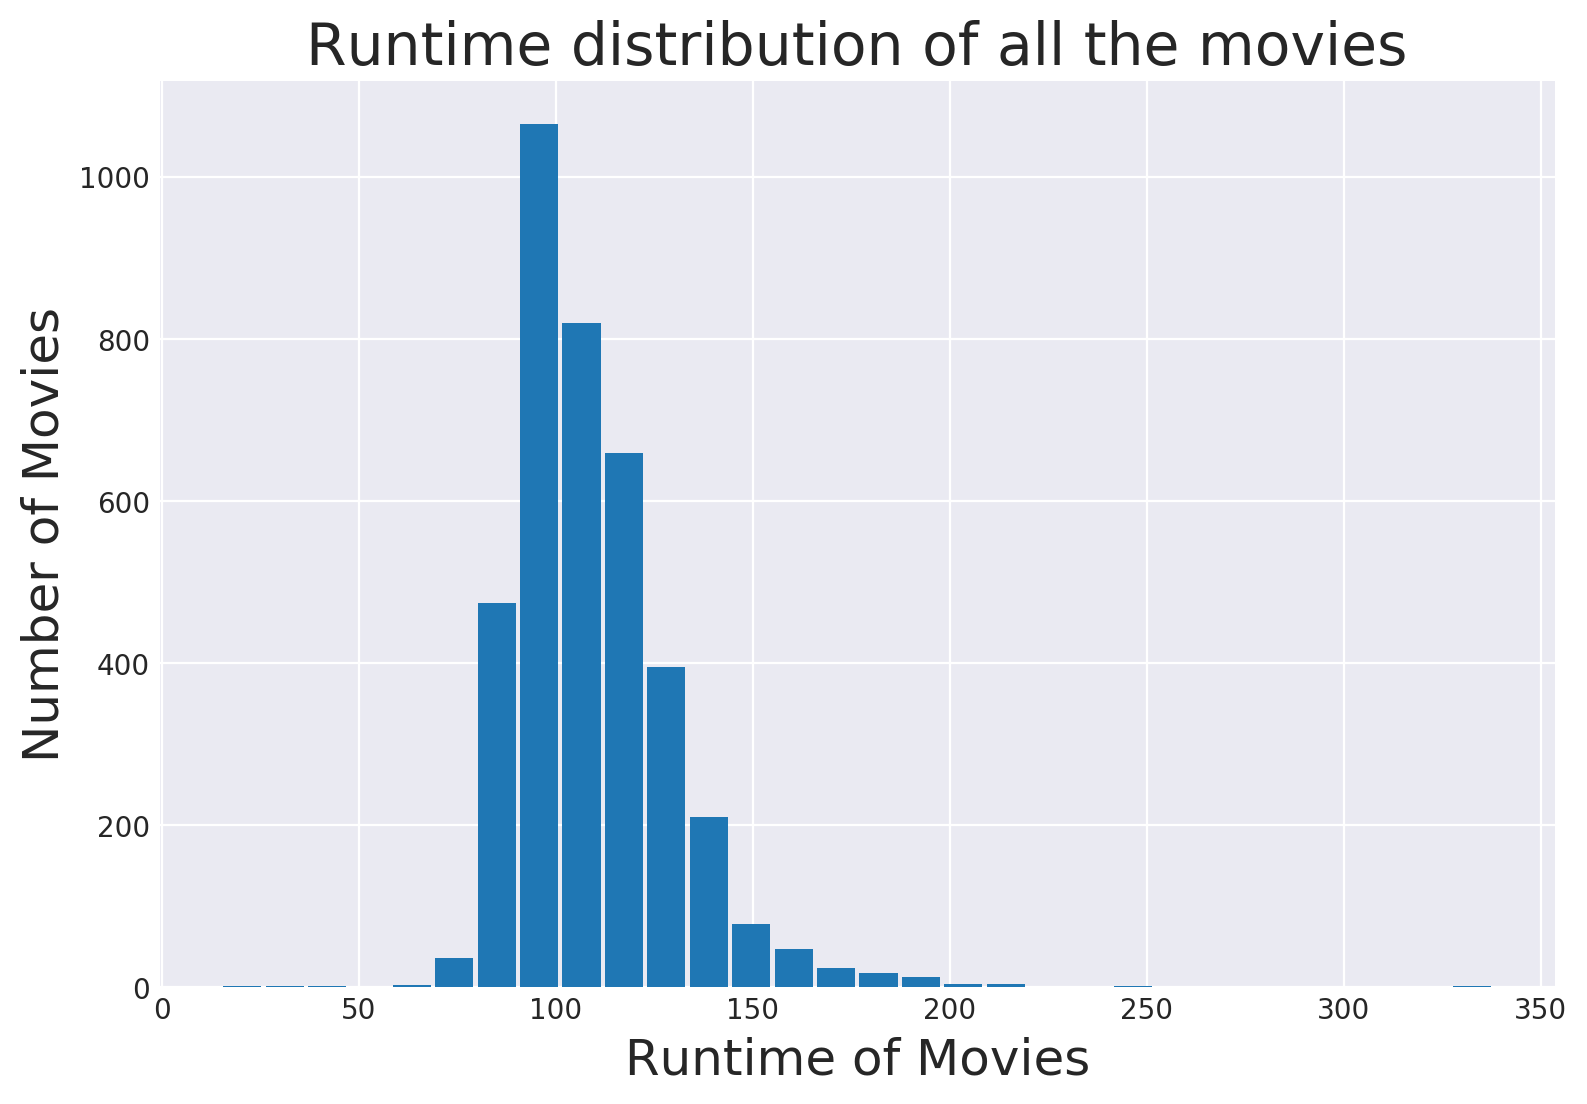

In [210]:
#plotting a histogram for runtime of movies
sns.set_style('darkgrid')
#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 18)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=18)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=21)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =30)
#displays the plot
plt.show()

<b>The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 115 minutes. Almost 1000 to many number of movies fall in this section.</b>

<b><li>Let's use Box plot and Data point plot and figure out the outliers of this distribution,</li></b>

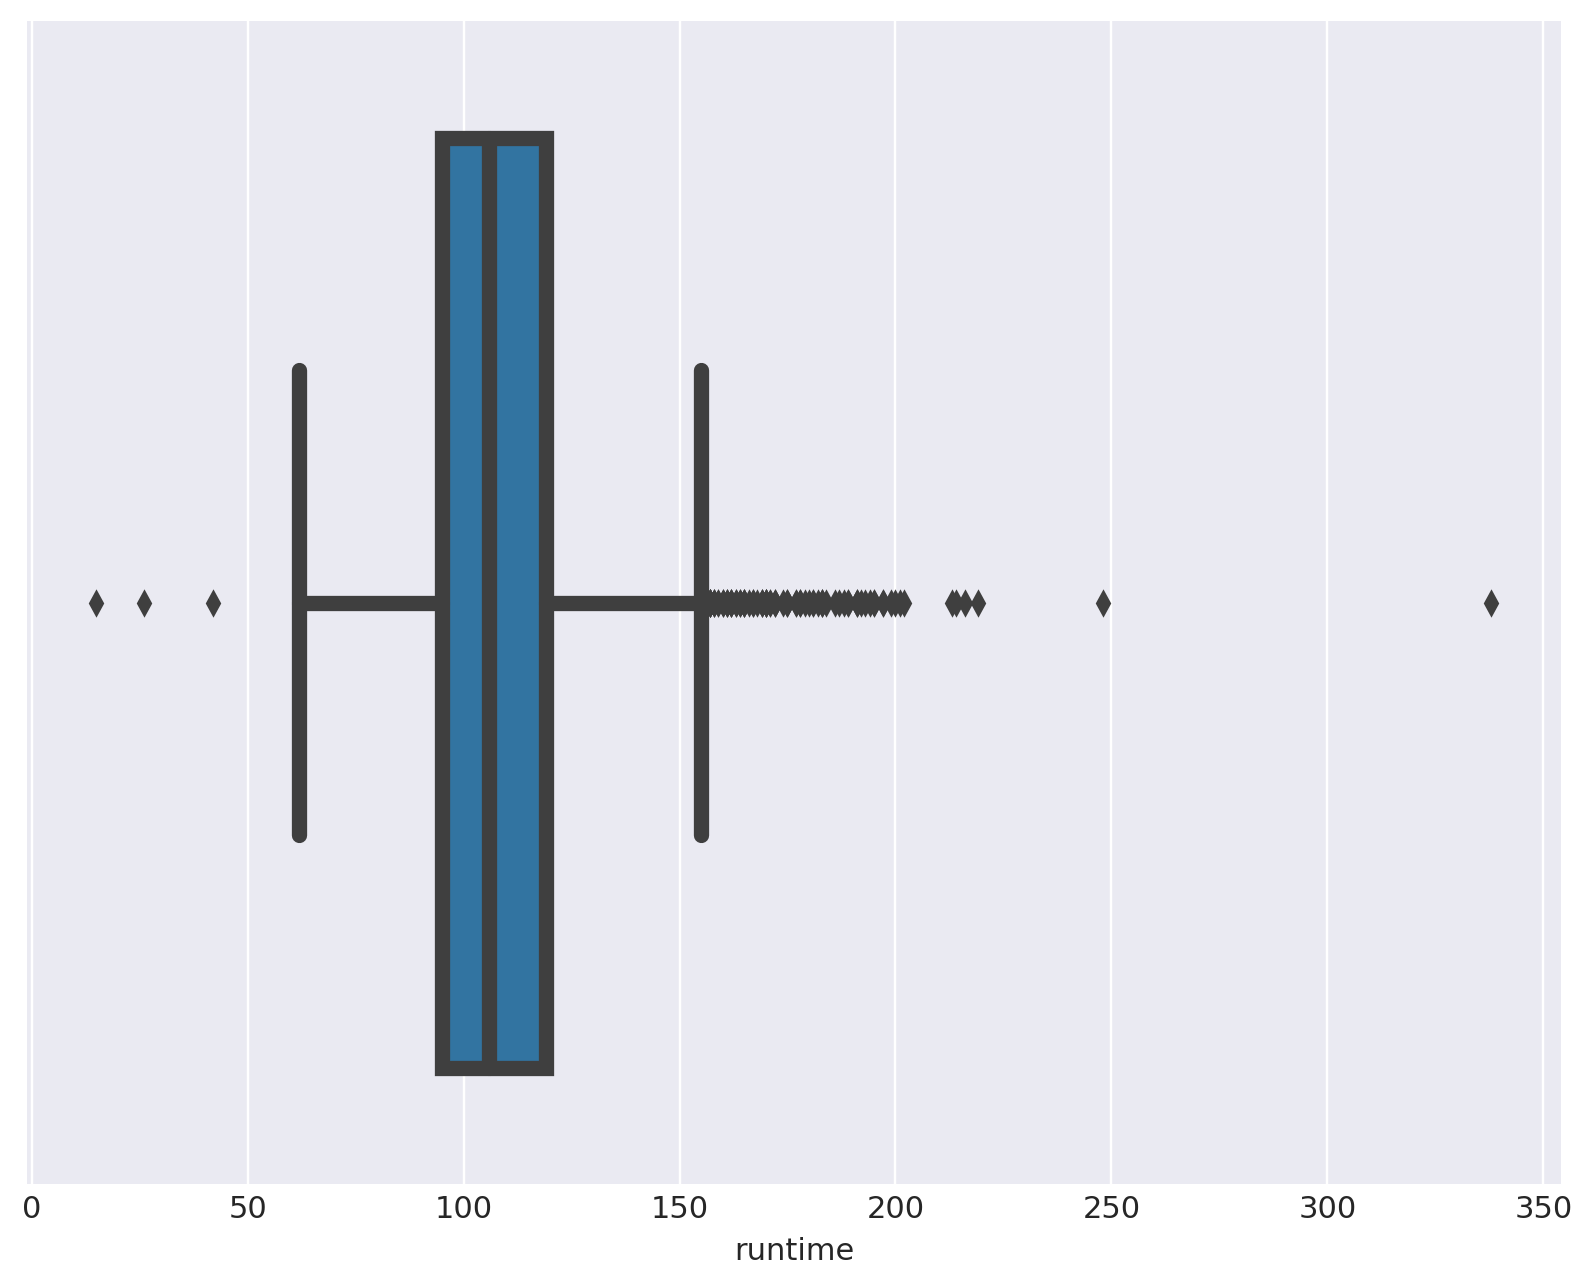

In [211]:
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 110)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 5)
#diplaying the plot
plt.show()

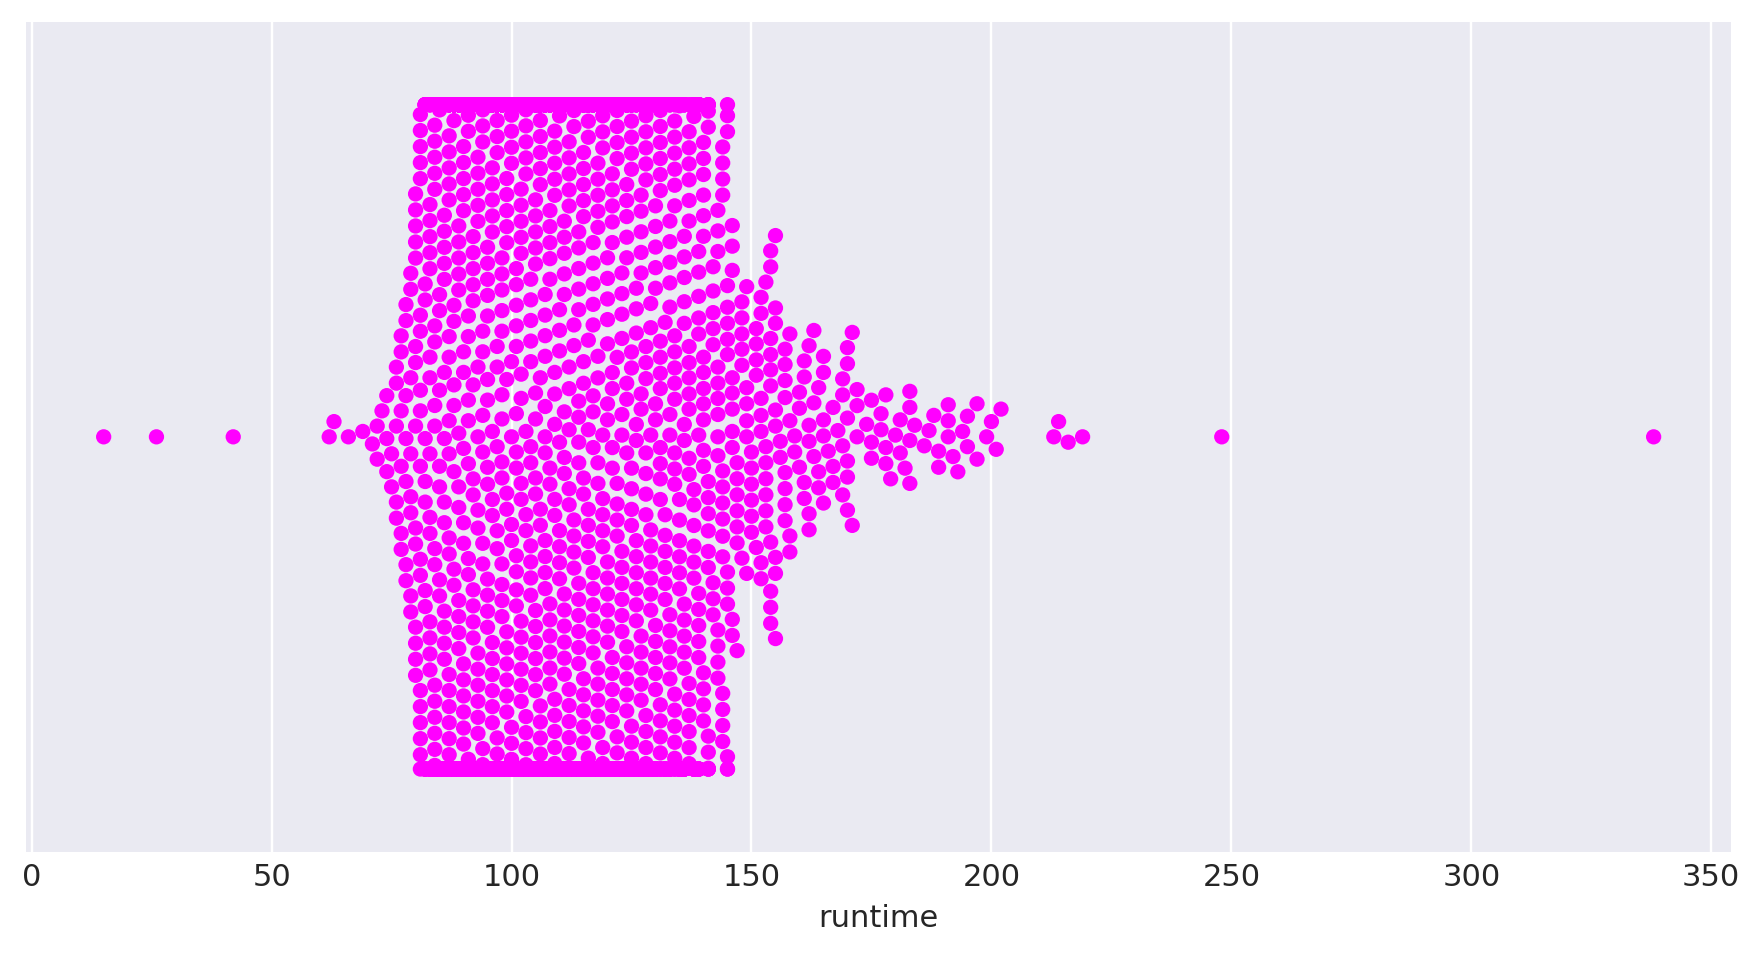

In [212]:
#plots the data points of runtime of movies

#giving figure size
plt.figure(figsize=(10,5), dpi = 110)

sns.swarmplot(df['runtime'], color = 'magenta')
plt.show()

In [213]:
#getting specific runtime points at x positions
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

<h4><u>Findings:</u></h4>
<li>Box-plot here gives us an overall idea of how spread the ditribution is in case of runtime of movies are. First of all what we get from this visualization is how many outliers we have, the min and max points, the median and IQR.</li>
<li>The plot generated using data point plot above gives us a visual of complete distribution of runtime of movies by plotting the points againts their respective position in the ditribution</li>
<ol>By looking at both the plots and calculations, we can say that,

<li>25% of movies have a runtime of less than 95 minutes.</li>
<li>50% of movies have a runtime of less than 109 minutes.(median)</li>
<li>75% of movies have a runtime of less than 119 minutes.</li>
<li>50% of movies have a runtime of between 95 min and `119 min`. This is also our IQR.</li></ol>

### Research Question 6 
<h3>In which year we had the most movies making profits?</h3>

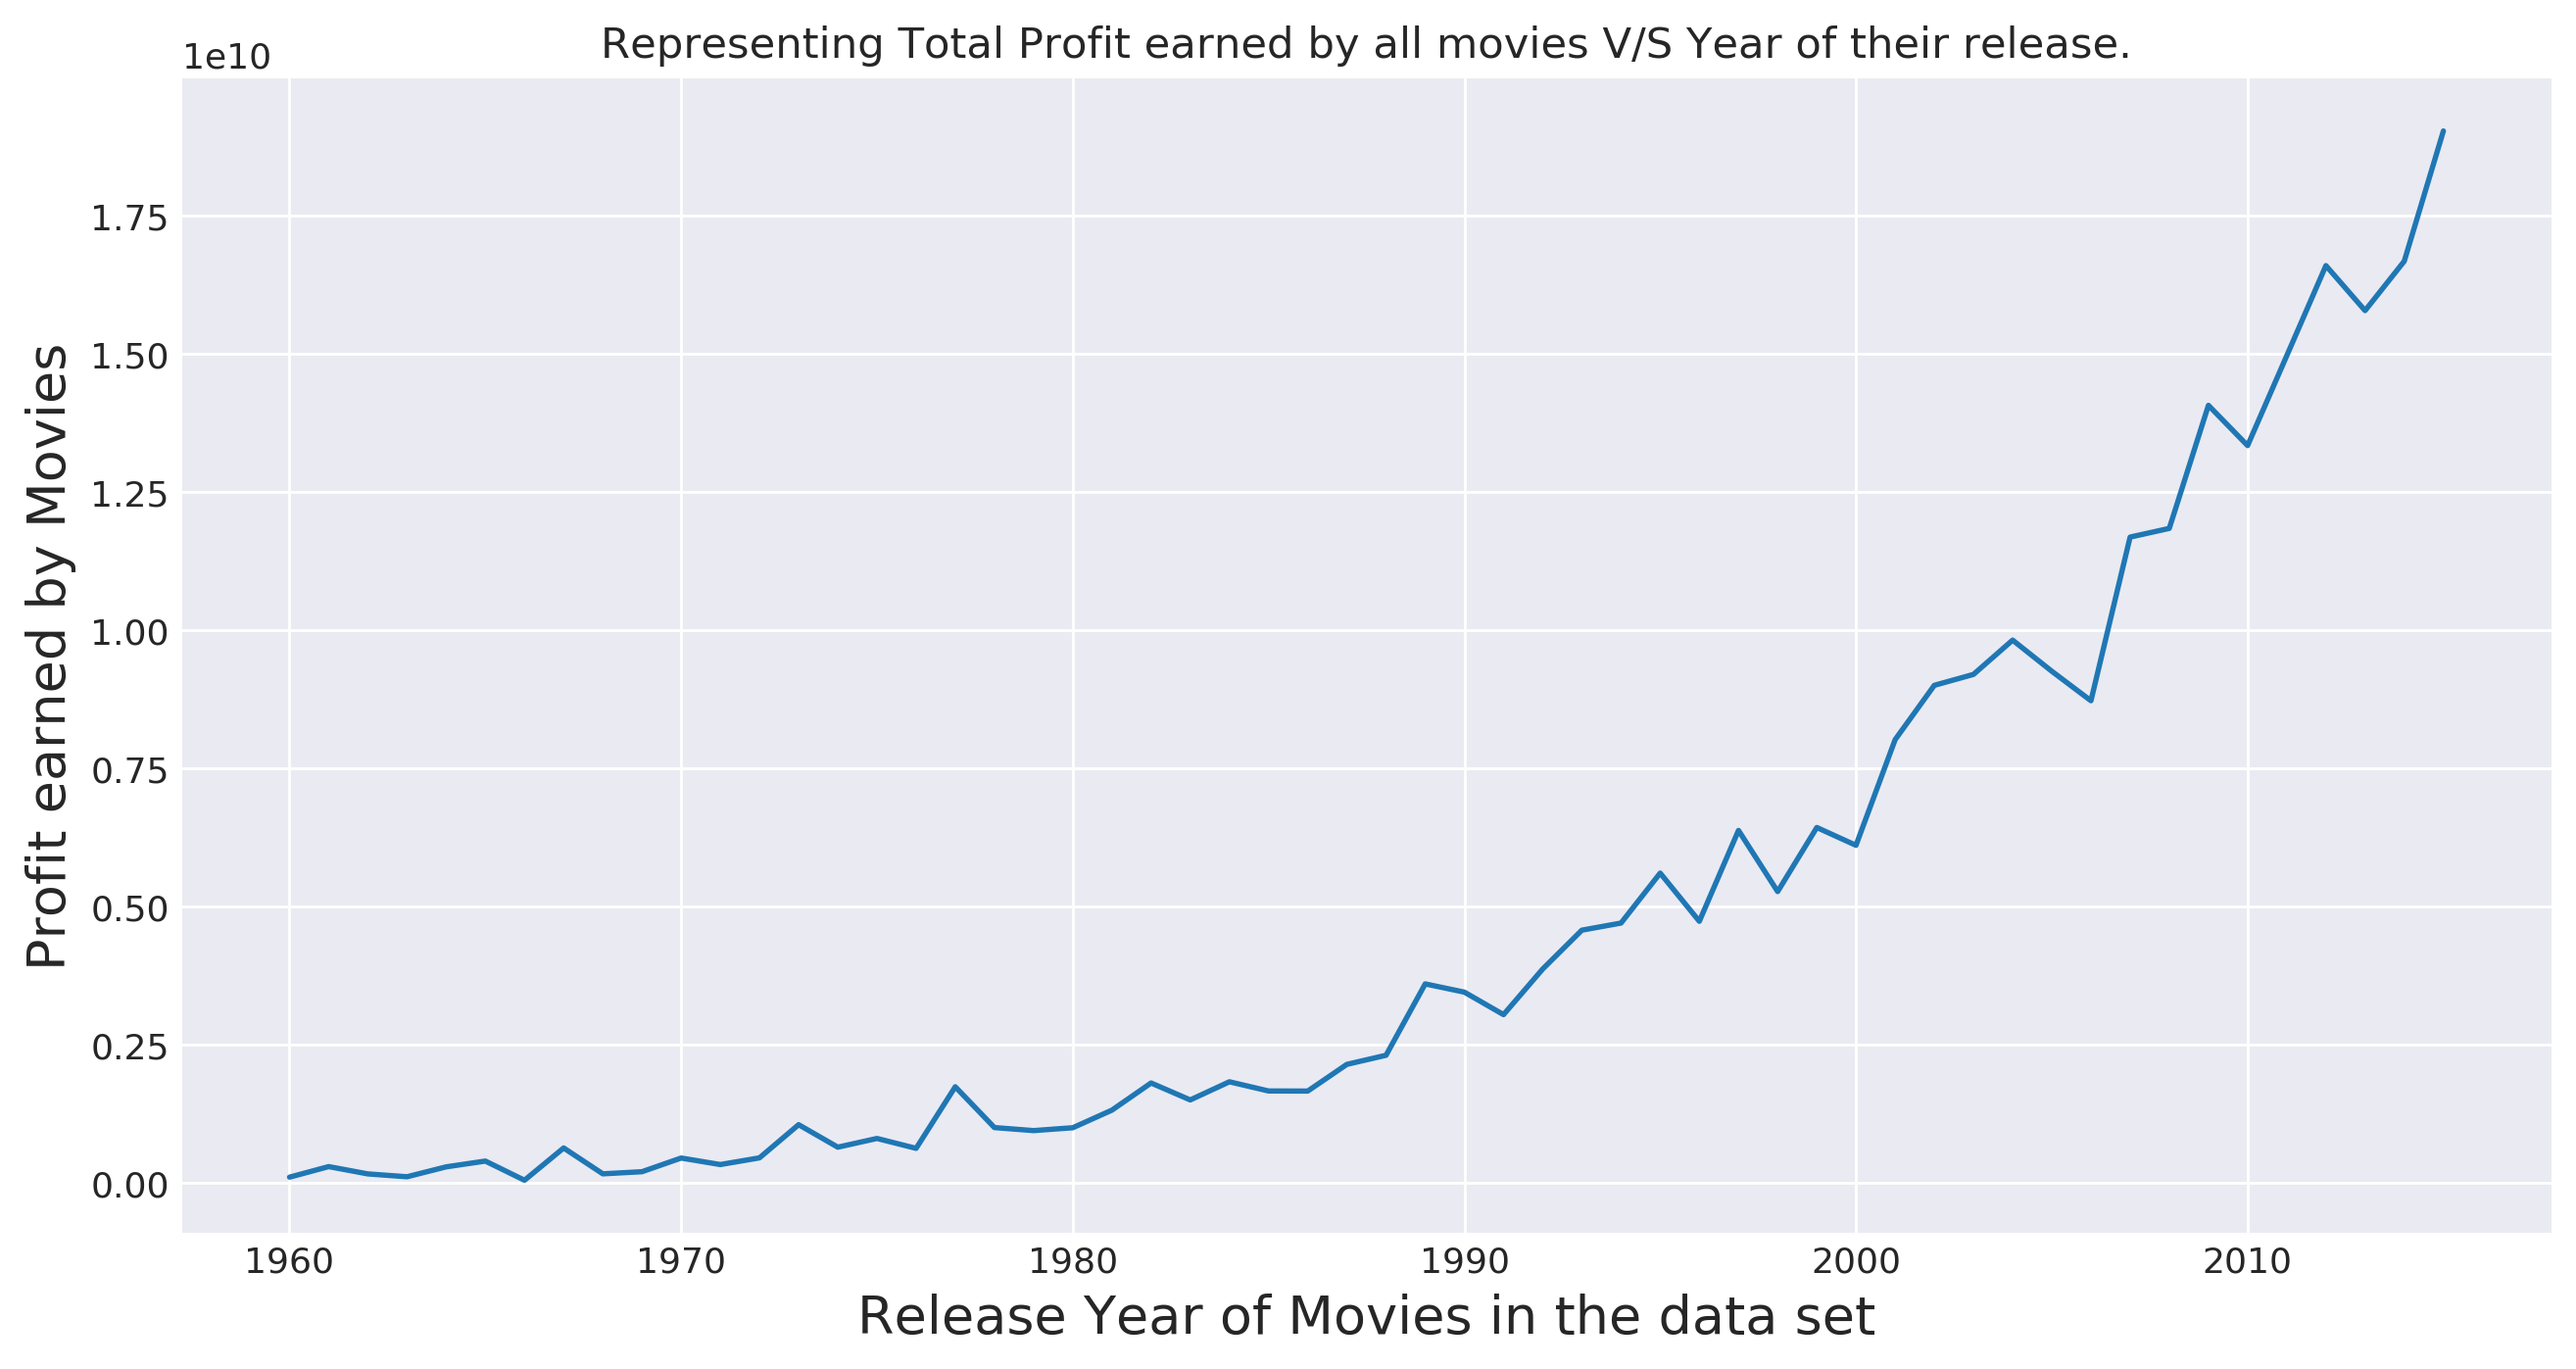

In [214]:
#let us use Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year
profits_year = df.groupby('release_year')['profit_earned(in_US-$)'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 15)
#on y-axis
plt.ylabel('Profit earned by Movies', fontsize = 15)
#title of the line plot
plt.title('Representing Total Profit earned by all movies V/S Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [215]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

<h4><u>Findings:</u></h4>
<br><b>we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.</b><br>
<b>This wraps up analysing the given dataset.</b>

<h3>Now,lets begin looking for Similar characteristics associated with the profitable movies can be analyzed</h3>

<br><b>Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.</b><br>

<b>So lets fix this amount to 50 million dollar.</b>

In [216]:
#select the movies having profit $50M or more
profit_data = df[df['profit_earned(in_US-$)'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget(in_US-$),revenue(in_US-$),profit_earned(in_US-$),original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [217]:
#number of rows of a dataframe
len(profit_data)

1338

So our dataset is drastically reduced to 1338 from 3853 rows(as in earlier case)

### Research Question 1 of Similar characteristics associated with the profitable movies:
<h3>Average duration of movies.</h3>

In [218]:
#defining a new average function for the new dataset
def profit_avg(column):
    return profit_data[column].mean()

<h4><u>Findings:</u></h4>
<b>we can see that movies belonging to 50M USD club and more have an average duration of 113 minutes.</b>

### Research Question 2 of Similar characteristics associated with the profitable movies:
<h3>Average Budget.</h3>

In [219]:
profit_avg('budget(in_US-$)')

60444957.760837071

<h4><u>Findings:</u></h4>
<b>Movies belonging to 50M USD club and more have an average budget of 60 million dollar.</b>

### Research Question 3 of Similar characteristics associated with the profitable movies:
<h3>Average revenue.</h3>

In [220]:
profit_avg('revenue(in_US-$)')

254957662.59491777

<h4><u>Findings:</u></h4>
<b>Movies belonging to 50M USD club and more have an average revenue of 255 million dollar.</b>

### Research Question 4 of Similar characteristics associated with the profitable movies
<h3>Average profits.</h3>

In [221]:
profit_avg('profit_earned(in_US-$)')

194512704.83408073

<h4><u>Findings:</u></h4>
<b>Movies belonging to 50M USD club and more have an average profit of 194 million dollar.</b>

### Research Question 5 of Similar characteristics associated with the profitable movies
<h3>Which director directed most films?</h3>

In [222]:
#lets create a function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [223]:
director_count = extract_data('director')
#shwoing top 5 values
director_count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ridley Scott        10
dtype: int64

<h4><u>Findings:</u></h4>
<b>out of all the movies belonging to 50M USD club and more of which,
    <li>23 have been directed by Steven Spielberg </li>
    <li>13 by Robert Zemeckis</li>
    <li>12 by Clint Eastwood</li>
    <li>11 by Tim Burton</li>
    <li>10 by Ridley Scott</li>
</b>

### Research Question 6 of Similar characteristics associated with the profitable movies
<h3>Which cast has appeared more frequently?</h3>

In [224]:
#this will variable will store the return value from a function
cast_count = extract_data('cast')
#shwoing top 5 values
cast_count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

<h4><u>Findings:</u></h4>
<b>out of all the movies belonging to 50M USD club and more of which,
    <li>Tom Cruise has been casted in 27 movies</li>
    <li>Brad Pitt has been casted in 25 movies</li>
    <li>Tom Hanks has been casted in 22 movies</li>
    <li>Sylvester Stallone has been casted in 21 movies</li>
    <li>Cameron Diaz has been casted in 20 movies</li>
</b>

### Research Question 7 of Similar characteristics associated with the profitable movies
<h3>Which genre were more successful?</h3>

In [225]:
genre_count = extract_data('genres')
genre_count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

Lets do a graphical analysis of this:

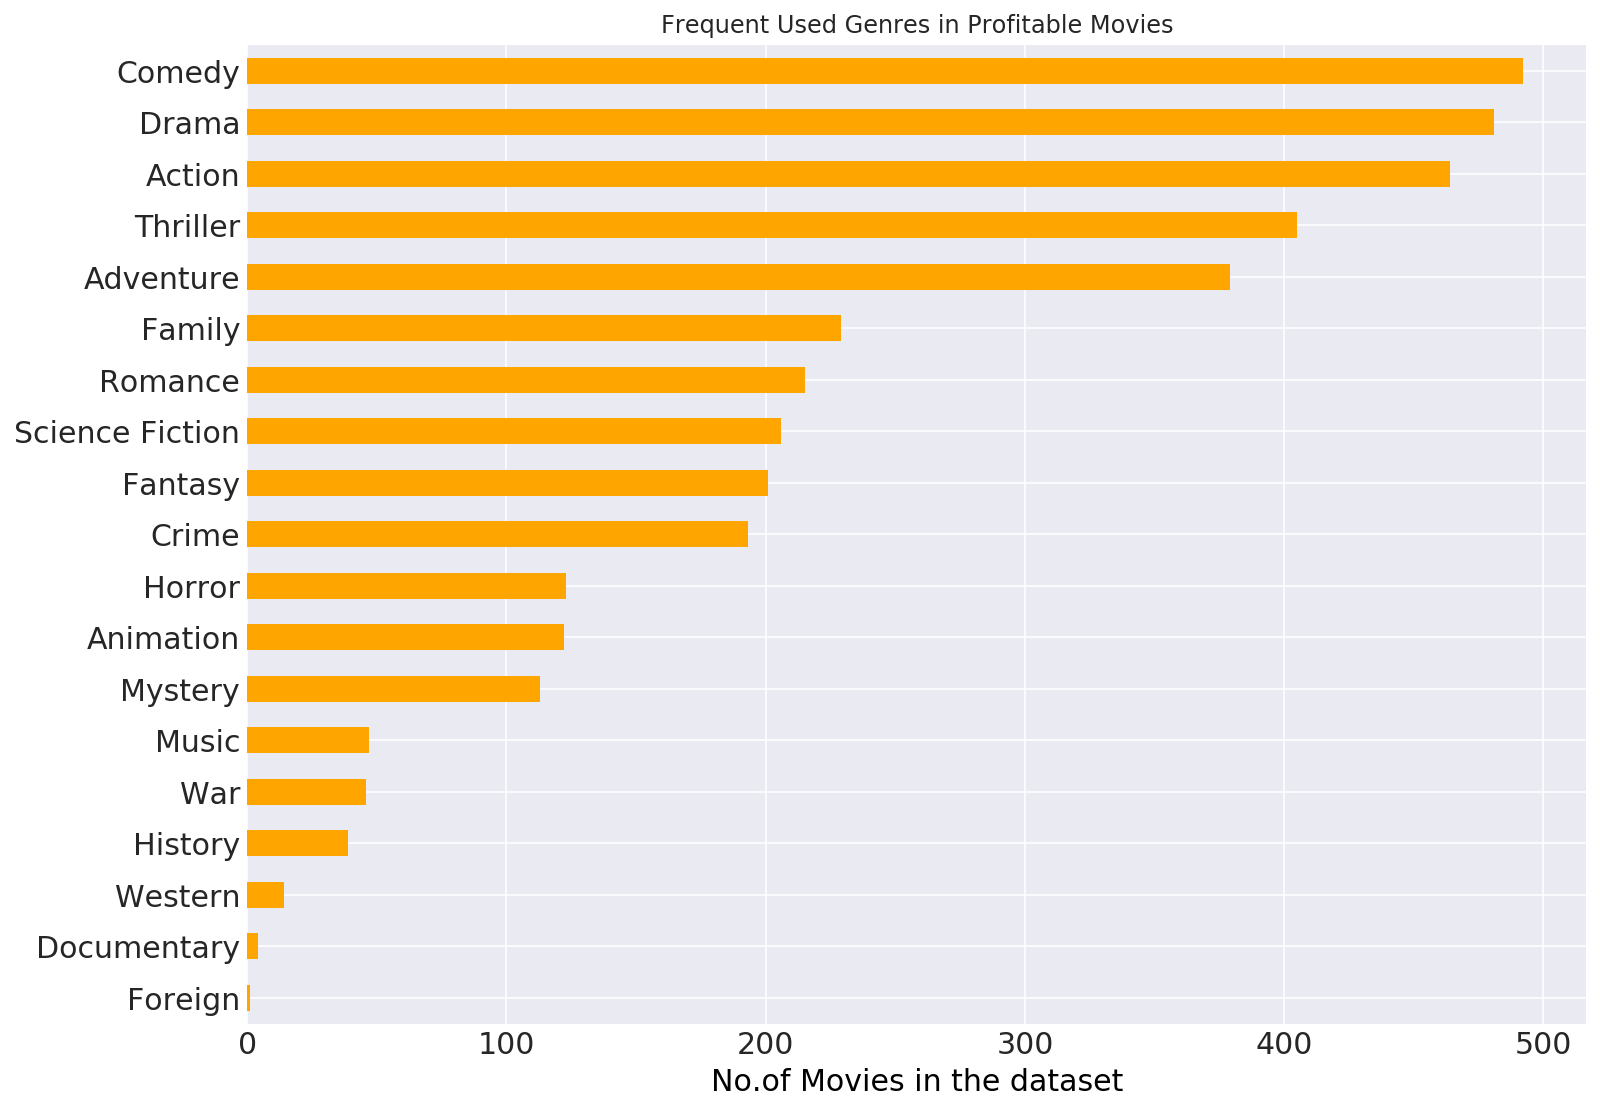

In [226]:
#lets plot the points in descending order top to bottom as we have data in same format.
genre_count.sort_values(ascending = True, inplace = True)

#ploting
lt = genre_count.plot.barh(color = 'orange', fontsize = 15)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('No.of Movies in the dataset', color = 'black', fontsize = '15')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

<h4><u>Findings:</u></h4>
<li>Action, Drama and Comedy genres are the most frequently used genre in this 50M USD club and more</li>  
<li>Comedy genre has about 492 movies which make 50M+ in profit.</li> 
<li>Even `Adventure` and `Thriller` also have some frequent 50M+ movies</li>
<b>We can conclude that Action,Drama,Comedy,Adventure and Thriller are some frequent 50M+  profit generators</b>

<a id='conclusions'></a>
<h2><u> Conclusions:</u></h2>
<b>Based on my investigation of the TMDb data set with my research questions,i can possibly predict the characteristics  for a movie to be profitable by the following criterias;</b>
<ol><li>Average Budget must be around 60 millon dollar</li>
<li>Average duration of the movie must be 113 minutes</li>
<li>Any one of these actors should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz.</li>
<li>Direction by any of these directors :Steven Spielberg, Robert Zemeckis, Ron Howard, Tony Scott, Ridley Scott.</li>
<li>Genre choice should be of : Action, Adventure, Thriller, Comedy, Drama.</li></ol>

<h3><u>Limitations:</u></h3> This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.

In [227]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

<b>sources</b>:Git hub repos:https://github.com/leogovan/investigate-a-dataset/blob/master/investigate-a-dataset-tidyup-version.ipynb<br>
        kaggle repos:https://www.kaggle.com/dynamic22/imdb-movie-dataset-exploration                       